In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

dataset =  load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_da_ind = df_da_ind.dropna(subset=['salary_year_avg'])

df_da_ind_explode = df_da_ind.explode('job_skills')

df_da_ind_explode[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [3]:
df_da_skills = df_da_ind_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count','median': 'median_salary'})

job_count_da = len(df_da_ind)

df_da_skills['skills_percent'] = (df_da_skills['skill_count']/job_count_da) *100

df_da_skills_ind = df_da_skills[df_da_skills['skills_percent'] > 0]

df_da_skills_ind

,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


In [4]:
skill_limit  = 5
df_da_skills_limit = df_da_skills_ind[df_da_skills_ind['skills_percent'] > skill_limit].copy()

df_da_skills_limit

,skill_count,median_salary,skills_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


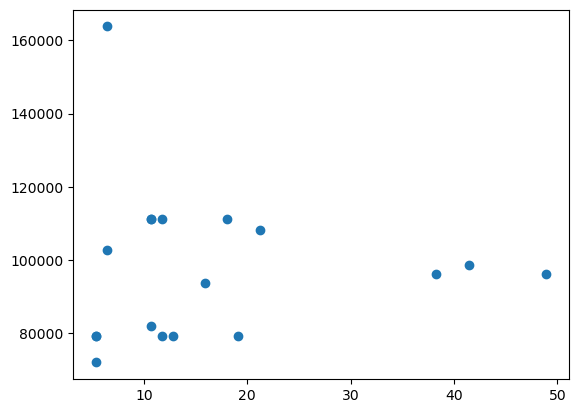

In [5]:
from adjustText import adjust_text

plt.scatter(df_da_skills_limit['skills_percent'],df_da_skills_limit['median_salary'])

In [6]:
df_tech =  df['job_type_skills'].copy()

df_tech = df_tech.drop_duplicates()

df_tech = df_tech.dropna()

tech_dict = {}

for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value

for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))

tech_dict

{'analyst_tools': ['spreadsheet',
  'power bi',
  'dax',
  'cognos',
  'tableau',
  'ssrs',
  'sap',
  'msaccess',
  'ssis',
  'alteryx',
  'sharepoint',
  'datarobot',
  'ms access',
  'esquisse',
  'splunk',
  'word',
  'nuix',
  'sas',
  'powerpoint',
  'looker',
  'sheets',
  'qlik',
  'spss',
  'visio',
  'powerbi',
  'outlook',
  'excel',
  'microstrategy'],
 'programming': ['solidity',
  'go',
  'ruby',
  't-sql',
  'swift',
  'powershell',
  'julia',
  'javascript',
  'html',
  'lisp',
  'scala',
  'shell',
  'c++',
  'golang',
  'bash',
  'dart',
  'typescript',
  'f#',
  'assembly',
  'crystal',
  'cobol',
  'mongo',
  'kotlin',
  'c#',
  'lua',
  'css',
  'elixir',
  'php',
  'mongodb',
  'fortran',
  'python',
  'sql',
  'no-sql',
  'nosql',
  'matlab',
  'ocaml',
  'sas',
  'perl',
  'groovy',
  'sass',
  'objective-c',
  'clojure',
  'pascal',
  'erlang',
  'rust',
  'haskell',
  'vba',
  'c',
  'visualbasic',
  'vb.net',
  'apl',
  'r',
  'delphi',
  'visual basic',
  'j

In [7]:
df_tech_dict = pd.DataFrame(list(tech_dict.items()),columns=['technology','skills'])

df_tech_dict

,technology,skills
0,analyst_tools,"[spreadsheet, power bi, dax, cognos, tableau, ..."
1,programming,"[solidity, go, ruby, t-sql, swift, powershell,..."
2,cloud,"[colocation, aurora, firebase, snowflake, hero..."
3,libraries,"[tensorflow, xamarin, plotly, ggplot2, hadoop,..."
4,other,"[yarn, jenkins, terminal, chef, kubernetes, gi..."
5,databases,"[couchbase, mongodb, sqlite, sqlserver, neo4j,..."
6,os,"[kali, arch, windows, wsl, redhat, ubuntu, fed..."
7,async,"[airtable, dingtalk, planner, wrike, clickup, ..."
8,webframeworks,"[blazor, gatsby, nuxt.js, node, ruby, fastapi,..."
9,sync,"[google chat, webex, symphony, twilio, ringcen..."


In [8]:
df_tech_dict =df_tech_dict.explode('skills')

df_tech_dict

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,power bi
0,analyst_tools,dax
0,analyst_tools,cognos
0,analyst_tools,tableau
...,...,...
9,sync,zoom
9,sync,rocketchat
9,sync,mattermost
9,sync,microsoft teams


In [9]:
df_da_skills_merged = df_da_skills_limit.merge(df_tech_dict,left_on='job_skills',right_on='skills')

df_da_skills_merged

,skill_count,median_salary,skills_percent,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


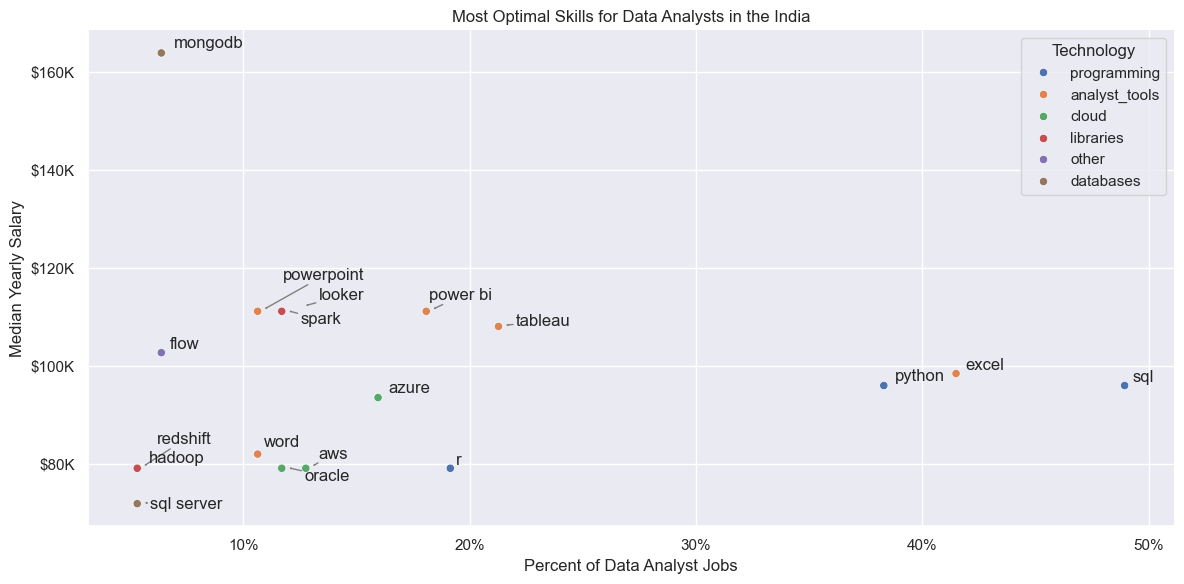

In [12]:
sns.scatterplot(
    data= df_da_skills_merged,
    x='skills_percent',
    y='median_salary',
    hue= 'technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i,txt in enumerate(df_da_skills_limit.index):
    x = df_da_skills_limit['skills_percent'].iloc[i] + 0.2  # Increase the x-coordinate
    y = df_da_skills_limit['median_salary'].iloc[i] + 200  # Increase the y-coordinate
    texts.append(plt.text(x, y, txt,))

for text in texts:
    if text.get_text() == "looker":  # Find the specific text for "looker"
        text.set_position((df_da_skills_limit['skills_percent'].loc['looker'] + 2,  # Move horizontally
                           df_da_skills_limit['median_salary'].loc['looker'] + 1000))  # Move vertically
        

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

sns.set(rc={'figure.figsize':(24, 12)})

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()